In [25]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegoreyes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegoreyes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import Datasets

## Fake news

In [2]:
df_fake_news = pd.read_csv('dataset/Fake.csv')

In [3]:
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake_news = df_fake_news[['text']]
df_fake_news['True or Fake'] = 'Fake'
df_fake_news = df_fake_news.rename(columns={'text': 'news'})

df_fake_news.head()

,news,True or Fake
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake


## True News

In [5]:
df_real_news = pd.read_csv('dataset/True.csv')

In [6]:
df_real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_real_news = df_real_news[['text']]
df_real_news['True or Fake'] = 'True'
df_real_news = df_real_news.rename(columns={'text': 'news'})

print(df_real_news.head())

                                                news True or Fake
0  WASHINGTON (Reuters) - The head of a conservat...         True
1  WASHINGTON (Reuters) - Transgender people will...         True
2  WASHINGTON (Reuters) - The special counsel inv...         True
3  WASHINGTON (Reuters) - Trump campaign adviser ...         True
4  SEATTLE/WASHINGTON (Reuters) - President Donal...         True


## Join
Join both datasets in one

In [8]:
df = pd.concat([df_fake_news, df_real_news], ignore_index=True)
print(df)

                                                    news True or Fake
0      Donald Trump just couldn t wish all Americans ...         Fake
1      House Intelligence Committee Chairman Devin Nu...         Fake
2      On Friday, it was revealed that former Milwauk...         Fake
3      On Christmas day, Donald Trump announced that ...         Fake
4      Pope Francis used his annual Christmas Day mes...         Fake
...                                                  ...          ...
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...         True
44894  LONDON (Reuters) - LexisNexis, a provider of l...         True
44895  MINSK (Reuters) - In the shadow of disused Sov...         True
44896  MOSCOW (Reuters) - Vatican Secretary of State ...         True
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...         True

[44898 rows x 2 columns]


# Normalize text

In [9]:
# Normalize
def normalize_text(text):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    text = text.lower()

    tokens = word_tokenize(text)

    cleaned_tokens = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:
            stemmed_token = stemmer.stem(token)
            cleaned_tokens.append(stemmed_token)

    return " ".join(cleaned_tokens)

df['news'] = df['news'].apply(normalize_text)


# Vectorization with TF-IDF

In [10]:
# Vectorization
vectorizer = TfidfVectorizer()

X = df['news']
y = df['True or Fake']

X_tfidf = vectorizer.fit_transform(X)

# Results
print("--- DataFrame with normalized text ---")
print(df)
print("\n" + "="*40 + "\n")

print("---TF-IDF Matriz Shape---")
print(X_tfidf.shape)
print("\n" + "="*40 + "\n")


--- DataFrame with normalized text ---
                                                    news True or Fake
0      donald trump wish american happi new year leav...         Fake
1      hous intellig committe chairman devin nune go ...         Fake
2      friday reveal former milwauke sheriff david cl...         Fake
3      christma day donald trump announc would back w...         Fake
4      pope franci use annual christma day messag reb...         Fake
...                                                  ...          ...
44893  brussel reuter nato alli tuesday welcom presid...         True
44894  london reuter lexisnexi provid legal regulator...         True
44895  minsk reuter shadow disus factori minsk street...         True
44896  moscow reuter vatican secretari state cardin p...         True
44897  jakarta reuter indonesia buy sukhoi fighter je...         True

[44898 rows x 2 columns]


---TF-IDF Matriz Shape---
(44898, 75434)




In [11]:
df.head()

,news,True or Fake
0,donald trump wish american happi new year leav...,Fake
1,hous intellig committe chairman devin nune go ...,Fake
2,friday reveal former milwauke sheriff david cl...,Fake
3,christma day donald trump announc would back w...,Fake
4,pope franci use annual christma day messag reb...,Fake


In [12]:
label_map = {'True': 1, 'Fake': 0}

# Aplicamos el mapeo para crear la columna objetivo numérica
df['True or Fake'] = df['True or Fake'].map(label_map)

print("--- DataFrame con etiquetas numéricas ---")
print(df)

--- DataFrame con etiquetas numéricas ---
                                                    news  True or Fake
0      donald trump wish american happi new year leav...             0
1      hous intellig committe chairman devin nune go ...             0
2      friday reveal former milwauke sheriff david cl...             0
3      christma day donald trump announc would back w...             0
4      pope franci use annual christma day messag reb...             0
...                                                  ...           ...
44893  brussel reuter nato alli tuesday welcom presid...             1
44894  london reuter lexisnexi provid legal regulator...             1
44895  minsk reuter shadow disus factori minsk street...             1
44896  moscow reuter vatican secretari state cardin p...             1
44897  jakarta reuter indonesia buy sukhoi fighter je...             1

[44898 rows x 2 columns]


Logistic Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# Logistic Regression

In [14]:
# Esta línea CREA la variable
log_reg_model = LogisticRegression(random_state=42)

# Esta línea ENTRENA el modelo que está en la variable
log_reg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'



--- Results Evaluation ---
Accuracy: 0.9837

Classification Report
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      7091
        True       0.98      0.98      0.98      6379

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



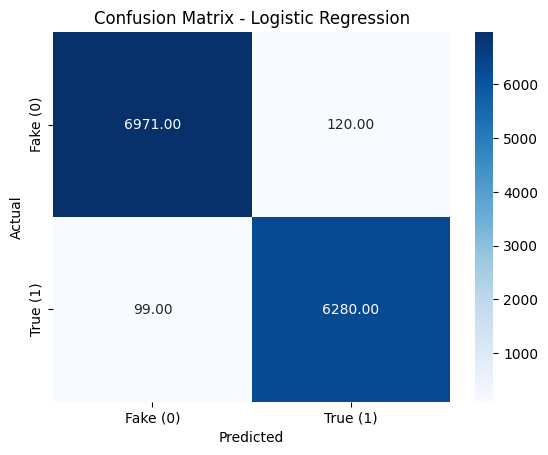

In [18]:
y_pred_log_reg = log_reg_model.predict(X_test)

print("\n--- Results Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg ):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred_log_reg ))

cm = confusion_matrix(y_test, y_pred_log_reg )
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Fake (0)', 'True (1)'],
            yticklabels=['Fake (0)', 'True (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# Decision Tree


--- Results Evaluation ---
Accuracy: 0.9951

Classification Report
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      7091
        True       1.00      0.99      0.99      6379

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470


--- Confusion Matriz - Decisio Tree ---


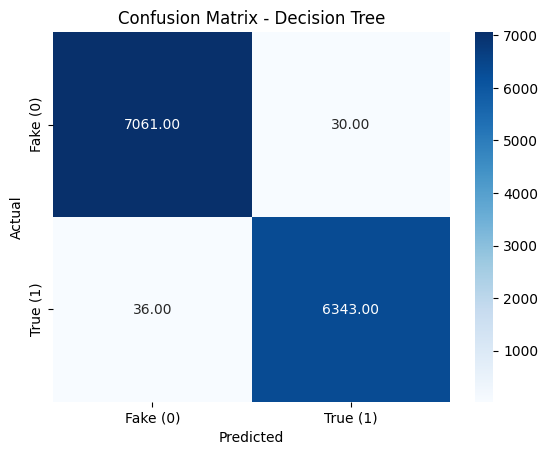


--- Decision Tree ---


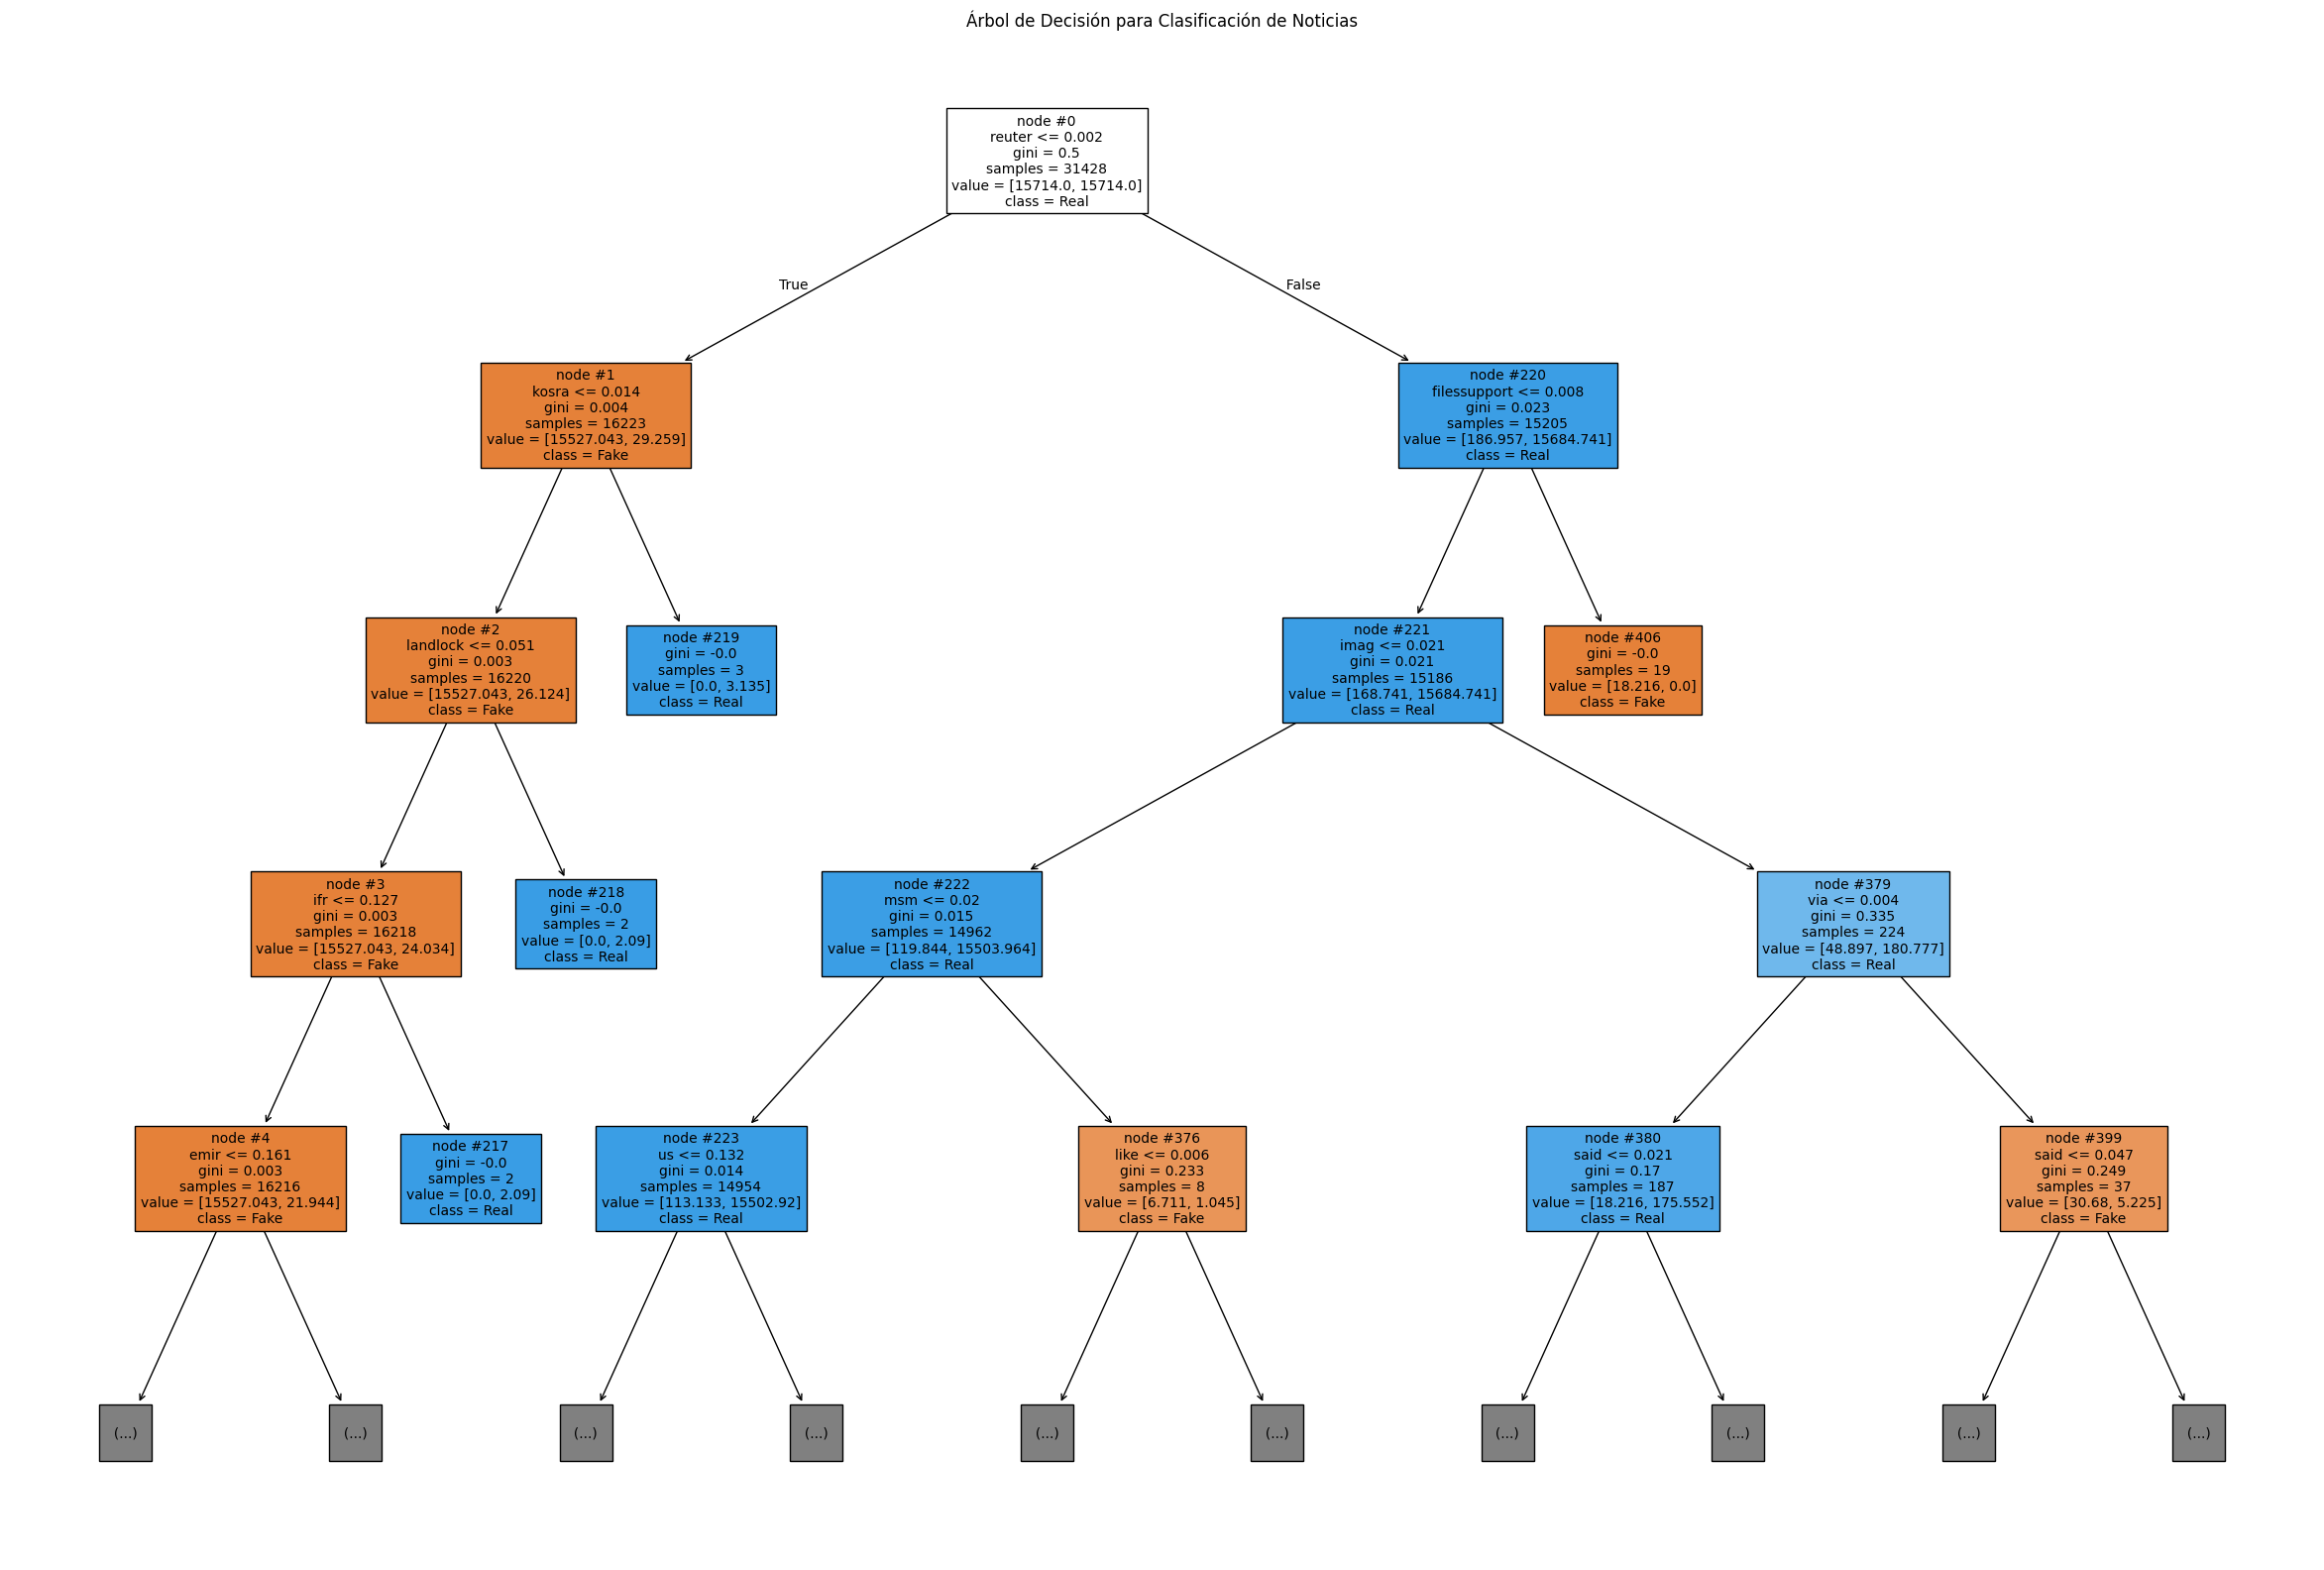

In [ ]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\n--- Results Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred_dt))

feature_names = vectorizer.get_feature_names_out()

print("\n--- Confusion Matriz - Decision Tree ---")
cm = confusion_matrix(y_test, y_pred_dt )
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Fake (0)', 'True (1)'],
            yticklabels=['Fake (0)', 'True (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\n--- Decision Tree ---")
plt.figure(figsize=(30, 20))
tree.plot_tree(
    dt_model,
    max_depth=4,
    feature_names=feature_names,
    class_names=['Fake', 'Real'],
    filled=True,
    fontsize=10,
    node_ids=True
)
plt.title("Árbol de Decisión para Clasificación de Noticias")
plt.show()


Este árbol de decisión visualiza las reglas que el modelo ha aprendido para clasificar una noticia como "Fake" o "Real". Cada nodo representa una pregunta sobre una palabra específica.

---
## Cómo Leer un Nodo
Cada caja en el árbol contiene la siguiente información:
* **Regla de Decisión**: La pregunta que se hace, basada en el puntaje TF-IDF de una palabra (ej. `reuter <= 0.002`).
* **Gini**: Mide la impureza del nodo. Un Gini de 0.0 significa que el nodo es "puro" (todas las noticias son de una clase), mientras que 0.5 es la máxima impureza (mezcla 50/50).
* **Samples**: El número de noticias que llegan a este nodo.
* **Value**: La distribución de las noticias entre las clases, en formato `[# de Falsas, # de Reales]`.
* **Class**: La clase mayoritaria en el nodo. El color también representa la clase (Naranja para 'Fake', Azul para 'Real').

---
## Rutas de Decisión Clave
* **División Raíz (Nodo #0)**: La pregunta más importante que el modelo aprendió es sobre la palabra **`reuter`**. Su presencia o ausencia (reflejada en su puntaje TF-IDF) es el factor más decisivo para empezar a clasificar.

* **Ruta Izquierda (si el puntaje de `reuter` es bajo - `True`)**:
    * Si la noticia no contiene la palabra `reuter` o su puntaje es muy bajo, el modelo se va a la izquierda (Nodo #1).
    * Este grupo ya tiene una mayoría de noticias 'Fake'. La siguiente pregunta clave es sobre la palabra `gop`. Esta rama del árbol parece ser la principal vía para identificar noticias falsas.

* **Ruta Derecha (si el puntaje de `reuter` es alto - `False`)**:
    * Si la noticia tiene un puntaje TF-IDF alto para `reuter`, el modelo se va a la derecha (Nodo #220).
    * Este grupo ya es mayoritariamente de noticias 'Real'. El modelo luego refina su decisión preguntando por palabras como `realdonaldtrump`.

---
## Conclusión
El modelo ha determinado que la fuente de la noticia (como **`reuter`**) es el predictor más fuerte. Ha aprendido a asociar la ausencia de ciertas palabras clave con noticias falsas y la presencia de otras con noticias reales. Palabras como `gop`, `fbi`, `clinton` y `said` también son importantes en los siguientes niveles de decisión.

# Random Forest 

Model trained!

--- Random Forest Performance ---
Accuracy: 0.9888

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7091
        True       0.99      0.99      0.99      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


--- Confusion Matriz - Random Forest ---


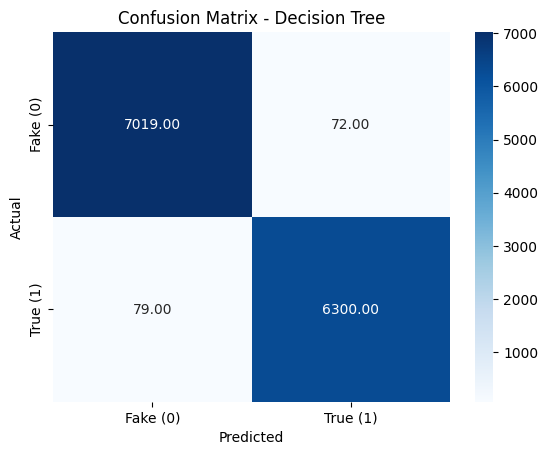

In [24]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)
print("Model trained!")

# 2. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate the model's performance
print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\n--- Confusion Matriz - Random Forest ---")
cm = confusion_matrix(y_test, y_pred_rf )
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Fake (0)', 'True (1)'],
            yticklabels=['Fake (0)', 'True (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [26]:
# --- 1. AdaBoost Model ---
print("Training AdaBoost model...")
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

print("\n--- AdaBoost Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(classification_report(y_test, y_pred_ada))
print("="*40)


# --- 2. Gradient Boosting Model ---
print("\nTraining Gradient Boosting model...")
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("\n--- Gradient Boosting Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc):.4f}")
print(classification_report(y_test, y_pred_gbc))
print("="*40)


# --- 3. XGBoost Model ---
print("\nTraining XGBoost model...")
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- XGBoost Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))
print("="*40)

Training AdaBoost model...

--- AdaBoost Performance ---
Accuracy: 0.9955
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      7091
        True       0.99      1.00      1.00      6379

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470


Training Gradient Boosting model...

--- Gradient Boosting Performance ---
Accuracy: 0.9952
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      7091
        True       0.99      1.00      0.99      6379

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470


Training XGBoost model...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Fake' 'True']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news          44898 non-null  object
 1   True or Fake  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
